In [109]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
#######################################################################################
#######################################################################################
##                 Cria/Importa objetos da PI Planning - PI/CA                       ##
##                                                                                   ##
## Desenvolvido por: Fábio Fumio Wada                                                ##
#######################################################################################
#######################################################################################

#######################################################################################
# Copie todo este texto e cole em um novo arquivo do Jupyter                          #
# Modelo                                                                              #
#######################################################################################

# Arquivo Oficial

# Padronizando para UTF-8
# -*- coding: utf-8 -*-

### [Importa Bibliotecas] 
import pandas as pd #Pandas
import numpy as np #Numpy
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import re

py.init_notebook_mode(connected=True)

#######################################################################################
##                                 Informar Valores:                                 ##   
#######################################################################################

### [Define Parâmetros]                                                              ##
v_pi = 'PI11' 
v_cod_obj = 'OP' #Inicial do código do objetivo associado na feature
v_cod_obj_s = 'OS' #Inicial do código do objetivo stretch associado na feature

### --> [Caminho do Arquivo para utilização de compilações locais]                   ##
v_diretorio = 'C:\\Users\\A98718\\OneDrive - Somos Educação SA\\PI_Planning - Analise\\'+v_pi+'\\'

### --> [Informar os nomes dos arquivos]  *.csv                                      ##
v_nomearquivo_iteracao = 'Iteracao.csv'   #arquivo não extraído do CA
v_nomearquivo_objetivos = 'Objetivos.csv'   #arquivo não extraído do CA
v_nomearquivo_feature = 'Features.csv'      
v_nomearquivo_stories = 'UserStories.csv'
v_nomearquivo_tasks = 'Tasks.csv'
v_nomearquivo_incidentes = 'Incidentes.csv'
v_nomearquivo_sservicos = 'SServicos.csv'

#######################################################################################   
#######################################################################################


#######################################################################################
### [ANOTAÇÕES] - INÍCIO                                                            ###
#######################################################################################

#Site de Cores - https://www.colorhexa.com/
#Gráficos - https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

#######################################################################################
### [ANOTAÇÕES] - FINAL                                                             ###
#######################################################################################


#######################################################################################
### [GLOBAL] - INÍCIO                                                               ###
#######################################################################################

#Limpa o campo TAGS das Features
def fn_limpa_tags(v_tags_origem):
    v_tags = v_tags_origem
    v_tags = v_tags.replace('Revisado','',regex=True)
    v_tags = v_tags.replace('(SM)','',regex=True)
    v_tags = v_tags.replace(r"\(.*?\)","",regex=True)
    v_tags = v_tags.replace('Apprendi!','',regex=True)
    v_tags = v_tags.replace('Stretch','',regex=True)
    v_tags = v_tags.replace(';','',regex=True)
    v_tags = v_tags.replace('#EP394','',regex=True)
    v_tags = v_tags.replace('#EP395','',regex=True)

    #remove espaços em branco - deixar como último comando
    v_tags = v_tags.replace(' ','',regex=True) 
    return (v_tags)

#######################################################################################
### [GLOBAL] - FIM                                                                  ###
#######################################################################################




#######################################################################################
### [ITERAÇÃO] - INÍCIO                                                            ###
#######################################################################################

### [Transforma os dados do .csv em um dataframe]
df_iteracao = pd.read_csv(v_diretorio+v_nomearquivo_iteracao , sep = ";") #sempre confirmar o caracter separador no arquivo
    #v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")

Lista_Iteracao = pd.DataFrame(df_iteracao)

#######################################################################################
### [ITERAÇÃO] - FIM                                                                ###
#######################################################################################




#######################################################################################
### [OBJETIVOS] - INÍCIO                                                            ###
#######################################################################################

## Necessário ter o campo "Codigo" na planilha excel

### [Define endereço do arquivo]

### Desabilitado para usar diretamente pelo Azure
"""
v_caminho_objetivos = ( v_diretorio_mae + 
                        v_subdiretorio+
                        v_nomearquivo_objetivos)
#v_caminho_objetivos = (v_nomearquivo_objetivos)
"""

### [Transforma os dados do .csv em um dataframe]
df_objetivos = pd.read_csv(v_diretorio+v_nomearquivo_objetivos , sep = ";") #sempre confirmar o caracter separador no arquivo
    #v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")
    
### [Transforma os dados do .xls/xlsx em um dataframe]
#df_objetivos = pd.read_excel(v_caminho_objetivos , sheet_name = "Sheet1")
    #v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")


### [Renomeia colunas]
df_objetivos.rename(columns = {'Release' : 'PI'}, inplace = True)
df_objetivos.rename(columns = {'Trem' : 'Trem'}, inplace = True)
df_objetivos.rename(columns = {'Time' : 'Time'}, inplace = True)
df_objetivos.rename(columns = {'Descrição do Objetivo' : 'Nome'}, inplace = True)
df_objetivos.rename(columns = {'Tipo do Objetivo' : 'Tipo'}, inplace = True)
df_objetivos.rename(columns = {'BV Planejado' : 'BV_Planejado'}, inplace = True)
df_objetivos.rename(columns = {'BV Realizado' : 'BV_Realizado'}, inplace = True)
df_objetivos.rename(columns = {'ID' : 'ID_PowerBI'}, inplace = True)
df_objetivos.rename(columns = {'Identificador' : 'Codigo'}, inplace = True)

### [Variáveis Auxiliares]
# Quantidade de Objetivos Normais
v_Obj = df_objetivos[(df_objetivos['PI'] == v_pi) & (df_objetivos['Tipo'] == 'Objetivo da PI')].Codigo.count()
# Quantidade de Objetivos Stretch
v_ObjS = df_objetivos[(df_objetivos['PI'] == v_pi) & (df_objetivos['Tipo'] == 'Objetivo Stretch')].Codigo.count()
# Quantidade Total de Objetivos (Normais + Stretch)
v_ObjT = df_objetivos.loc[df_objetivos['PI'] == v_pi].Codigo.count()

# Quantidade de Objetivos com erros
        #** Objetivos (com erros cadastrais - "A") = "Código do Objetivo não pertence a PI informada"
        #** Objetivos (com erros cadastrais - "B") = "Código do Objetivo pertence a PI, mas o campo PI não corresponde a PI informada"
v_ObjErroA = df_objetivos[~df_objetivos['Codigo'].str.contains((v_pi),na=False) & (df_objetivos['PI'] == v_pi)].Codigo.count()
v_ObjErroB = df_objetivos[df_objetivos['Codigo'].str.contains((v_pi),na=False) & (df_objetivos['PI'] != v_pi)].Codigo.count()

# Percentual de Objetivos
v_ObjPerc = ((v_Obj*100)/v_ObjT)
# Percentual de Objetivos Stretch
v_ObjSPerc = ((v_ObjS*100)/v_ObjT)

# Quantidade e Percentual (String) - Usado em Gráficos e Relatórios/Resumos
v_ObjT_Qtd_Perc = str(v_ObjT)+' - '+str('100')+'%'
v_Obj_Qtd_Perc = str(v_Obj)+' - '+str(v_ObjPerc)+'%'
v_ObjS_Qtd_Perc = str(v_ObjS)+' - '+str(v_ObjSPerc)+'%'

### [Cria um novo dataframe de Objetivos]
        #** Objetivos (com erros cadastrais - "A") = "Código do Objetivo não pertence a PI informada"
        #** Objetivos (com erros cadastrais - "B") = "Código do Objetivo pertence a PI, mas o campo PI não corresponde a PI informada"
        #*** Objetivos com erros cadastrais influenciam na quantidade e percentual apresentado
        #*** Execute a função "fn_obj_erros(v_pi) para verificar quais objetivos precisam de correção"
df_obj_qtd = pd.DataFrame({'PI':[v_pi], 'Total_Obj':[v_ObjT], 'Objetivos_PI':[v_Obj], 'Objetivos_Stretch':[v_ObjS], 'Perc_Obj_PI':[v_ObjPerc], 'Perc_Obj_Stretch':[v_ObjSPerc], 'Erro_A':[v_ObjErroA], 'Erro_B':[v_ObjErroB]})


Lista_OBJ_Total = pd.DataFrame(df_obj_qtd)



### [Cria Funções]

### [Objetivos - Listagem] - Lista Objetivos
#    Parâmetros:    "O" - Somente Objetivos (Sem Objetivos Stretch) 
#                   "S" - Somente Objetivos Stretch
#                   "F" - Todos os Objetivos
def fn_obj_listagem(v_pi,v_opcao):
    if v_opcao == "O": #Objetivo sem Stretch
        return df_objetivos[(df_objetivos['PI'] == v_pi) & (df_objetivos['Tipo'] == 'Objetivo da PI')]
    elif v_opcao == "S": #Objetivo Stretch
        return df_objetivos[(df_objetivos['PI'] == v_pi) & (df_objetivos['Tipo'] == 'Objetivo Stretch')]
    elif v_opcao == "F": #Todos os Objetivos
        return df_objetivos[(df_objetivos['PI'] == v_pi)]
    else:
        print('Opção Indisponível: '+'"'+v_opcao+'"')
        
### [OBJETIVOS] - Quantidade e Percentuais
def fn_obj_quantidade():

    #lista valores das variáveis auxliares que são usadas no dataframe "df_obj_qtd"
    
    print('========================================')
    print('PI                    : ' + v_pi)
    print('Objetivos (Total)     : ' + v_ObjT_Qtd_Perc)
    print('Objetivos (PI)        : ' + v_Obj_Qtd_Perc)
    print('Objetivos (Stretch)   : ' + v_ObjS_Qtd_Perc)
    print('========================================')
    print('* Objetivos (Com Erros Cadastrais - "A"): ' + v_ObjErroA.astype(str))
    print('* Objetivos (Com Erros Cadastrais - "B"): ' + v_ObjErroB.astype(str))
    print('')
    print('')
    print('** Objetivos (com erros cadastrais - "A") = "Código do Objetivo não pertence a PI informada"')
    print('** Objetivos (com erros cadastrais - "B") = "Código do Objetivo pertence a PI, mas o campo PI não corresponde a PI informada"')
    print('')
    print('*** Objetivos com erros cadastrais influenciam na quantidade e percentual apresentado')
    print('*** Execute a função "fn_obj_erros(v_pi) para verificar quais objetivos precisam de correção"')
    print('')        
    
    
### [Objetivos - Listagem] - Lista Erros Cadastrais
# Ex: 1) Código do Objetivo não pertence a PI informada. Ex: PI09 é oficial e possui objetivo da PI08
#     2) Código do Objetivo pertence a PI, mas o campo PI não corresponde a PI informada

def fn_obj_erros(v_pi):
    return df_objetivos[~df_objetivos['Codigo'].str.contains((v_pi),na=False) & (df_objetivos['PI'] == v_pi)]
    return df_objetivos[df_objetivos['Codigo'].str.contains((v_pi),na=False) & (df_objetivos['PI'] != v_pi)]

   
# Lista OBJETIVOS [Comando para apresentação]
Lista_OBJ_FULL = pd.DataFrame(df_objetivos) #monta dataframe a partir de um dataframe já existente

#somente Iteration - Mínimo [DataFrame Auxiliar]
Lista_OBJ = pd.DataFrame(df_objetivos[['ID_PowerBI','Nome','ESPECÍFICO','Tipo','Codigo', 'BV_Planejado',
                                                 'Entrega_PPT', 'Previsao_Ferrari']])


#######################################################################################
### [OBJETIVOS] - FIM                                                               ###
#######################################################################################




#######################################################################################
### [FEATURE] - INÍCIO                                                              ###
#######################################################################################

### [Define endereço do arquivo]
### Desabilitado para usar diretamente pelo Azure
"""
v_caminho_feature = (   v_diretorio_mae + 
                        v_subdiretorio+
                        v_nomearquivo_feature)
#v_caminho_feature = (v_nomearquivo_feature)
"""

### [Transforma os dados do .csv em um dataframe]
df_feature = pd.read_csv(v_diretorio+v_nomearquivo_feature , sep = ",") #Conferir sempre o separador no arquivo
    # v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")
    # pd.read_csv('nome_do_arquivo.csv', encoding='ISO-8859-1')

### [Renomeia colunas]
df_feature.rename(columns = {'Formatted ID' : 'Codigo'}, inplace = True)
df_feature.rename(columns = {'Name' : 'Nome'}, inplace = True)
df_feature.rename(columns = {'Release' : 'PI'}, inplace = True)
df_feature.rename(columns = {'State' : 'Status'}, inplace = True)
df_feature.rename(columns = {'Percent Done By Story Plan Estimate' : 'Percent_por_PlanEstimate'}, inplace = True)
df_feature.rename(columns = {'Percent Done By Story Count' : 'Percent_por_QtdHistoria'}, inplace = True)
df_feature.rename(columns = {'Project' : 'Time'}, inplace = True)
df_feature.rename(columns = {'Owner' : 'Responsavel'}, inplace = True)
df_feature.rename(columns = {'Parent' : 'Epico'}, inplace = True)
df_feature.rename(columns = {'Tags' : 'Tags'}, inplace = True)


### [Cria coluna Codigo_Objetivo]
df_feature['Codigo_Objetivo'] = 'NaN'
df_feature['Codigo_Objetivo'] = fn_limpa_tags(df_feature['Tags'])

### [Variáveis Auxiliares]
# Quantidade de Features Normais
v_Ftr = df_feature[df_feature['Tags'].str.contains((v_cod_obj+v_pi),na=False) & (df_feature['PI'] == v_pi)].Codigo.count()
# Quantidade de Feature Stretch
v_FtrS = df_feature[df_feature['Tags'].str.contains((v_cod_obj_s+v_pi),na=False) & (df_feature['PI'] == v_pi)].Codigo.count()
# Quantidade Total de Features (Normais + Stretch)
v_FtrT = df_feature.loc[df_feature['PI'] == v_pi].Codigo.count()

# Quantidade de Features com erros
v_FtrErroA = df_feature[~df_feature['Tags'].str.contains((v_pi),na=False) & (df_feature['PI'] == v_pi)].Codigo.count()
v_FtrErroB = df_feature[df_feature['Tags'].str.contains((v_pi),na=False) & (df_feature['PI'] != v_pi)].Codigo.count()
    
# Percentual de Feature
v_FtrPerc = ((v_Ftr*100)/v_FtrT)
# Percentual de Feature Stretch
v_FtrSPerc = ((v_FtrS*100)/v_FtrT)

### [Cria um novo dataframe de Features]
    #** Features (Com Erros Cadastrais - A) = "Ausência de Objetivo e/ou Objetivo pertencente a outra PI"'
    #** Features (Com Erros Cadastrais - B) = "Objetivo da PI atual vinculado a uma Feature de outra PI"'
df_ftr_qtd = pd.DataFrame({'PI':[v_pi], 'Total_Feature':[v_FtrT], 'Features_Obj_PI':[v_Ftr], 'Features_Obj_Stretch':[v_FtrS], 'Perc_Ftr_Objetivos_PI':[v_FtrPerc], 'Perc_Ftr_Objetivos_Stretch':[v_FtrSPerc], 'Erro_A':[v_FtrErroA], 'Erro_B':[v_FtrErroB]})

Lista_FTR_Total = pd.DataFrame(df_ftr_qtd)

Lista_FTR = df_feature[["Codigo","Nome","Tags","Codigo_Objetivo"]]

### [Feature - Listagem] - Lista Features
#    Parâmetros:    "O" - Somente Objetivos (Sem Objetivos Stretch) 
#                   "S" - Somente Objetivos Stretch
#                   "F" - Todos os Objetivos
def fn_ftr_listagem(v_pi,v_opcao):
    if v_opcao == "O": #Objetivo sem Stretch
        return df_feature[df_feature['Tags'].str.contains((v_cod_obj+v_pi),na=False) & (df_feature['PI'] == v_pi)]
    elif v_opcao == "S": #Objetivo Stretch
        return df_feature[df_feature['Tags'].str.contains((v_cod_obj_s+v_pi),na=False) & (df_feature['PI'] == v_pi)]
    elif v_opcao == "F": #Todos os Objetivos 
        return df_feature.loc[df_feature['PI'] == v_pi]
    else:
        print('Opção Indisponível: '+'"'+v_opcao+'"')

### [Feature - Listagem] - Quantidade e Percentuais
def fn_ftr_quantidade():

    #lista valores das variáveis auxliares que são usadas no dataframe "df_obj_qtd"
    
    print('========================================')
    print('PI                    : ' + v_pi)
    print('Features (Total)      : ' + v_FtrT.astype(str) + ' - (100%)')
    print('Features (PI)         : ' + v_Ftr.astype(str)  + ' - (' + v_FtrPerc.astype(str)+'%)')
    print('Features (Stretch)    : ' + v_FtrS.astype(str) + ' - (' + v_FtrSPerc.astype(str)+'%)')
    print('========================================')
    print('* Features (Com Erros Cadastrais - "A"): ' + v_FtrErroA.astype(str))
    print('* Features (Com Erros Cadastrais - "B"): ' + v_FtrErroB.astype(str))
    print('')
    print('')
    print('** Features (Com Erros Cadastrais - A) = "Ausência de Objetivo e/ou Objetivo pertencente a outra PI"')
    print('** Features (Com Erros Cadastrais - B) = "Objetivo da PI atual vinculado a uma Feature de outra PI"')
    print('')
    print('*** Features com erros cadastrais influenciam na quantidade e percentual apresentado')
    print('*** Execute a função "fn_ftr_erros(v_pi) para verificar quais objetivos precisam de correção"')
    print('')                

    
### [Feature - Listagem] - Lista Erros Cadastrais
# Ex: 1) Feature sem um objetivo da "PI" vinculado. Ex: PI09 é oficial e possui objetivo da PI08
#     2) Feature sem objetivo

def fn_ftr_erros(v_pi):
    return df_feature[~df_feature['Tags'].str.contains((v_pi),na=False) & (df_feature['PI'] == v_pi)]
    return df_feature[df_feature['Tags'].str.contains((v_pi),na=False) & (df_feature['PI'] != v_pi)]
       
#######################################################################################
### [FEATURE] - FIM                                                                 ###
#######################################################################################



#######################################################################################
### [USER STORY] - INÍCIO                                                           ###
#######################################################################################
### [Define endereço do arquivo]
### Desabilitado para usar diretamente pelo Azure
""""
v_caminho_stories = (   v_diretorio_mae + 
                        v_subdiretorio+
                        v_nomearquivo_stories)
#v_caminho_stories = (v_nomearquivo_stories)
"""
### [Transforma os dados do .csv em um dataframe]
df_stories_tmp = pd.read_csv(v_diretorio+v_nomearquivo_stories, sep = ",")
    # v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")
    # pd.read_csv('nome_do_arquivo.csv', encoding='ISO-8859-1')
    
### [Renomeia colunas]
df_stories_tmp.rename(columns = {'Formatted ID' : 'Codigo'}, inplace = True)
df_stories_tmp.rename(columns = {'Name' : 'Nome'}, inplace = True)
df_stories_tmp.rename(columns = {'Blocked' : 'Blocked'}, inplace = True)
df_stories_tmp.rename(columns = {'Ready' : 'Ready'}, inplace = True)
df_stories_tmp.rename(columns = {'Feature' : 'Feature'}, inplace = True)
df_stories_tmp.rename(columns = {'Release' : 'PI'}, inplace = True)
df_stories_tmp.rename(columns = {'Iteration' : 'Iteracao'}, inplace = True)
df_stories_tmp.rename(columns = {'Schedule State' : 'Status'}, inplace = True)
df_stories_tmp.rename(columns = {'Plan Estimate' : 'Plan Estimate'}, inplace = True)
df_stories_tmp.rename(columns = {'Task Estimate Total' : 'Task Estimate Total (hs)'}, inplace = True)
df_stories_tmp.rename(columns = {'Task Actual Total' : 'Task Actual Total (hs)'}, inplace = True)
df_stories_tmp.rename(columns = {'Task Remaining Total' : 'Task Remaining Total'}, inplace = True)
df_stories_tmp.rename(columns = {'Tipo' : 'Tipo'}, inplace = True)
df_stories_tmp.rename(columns = {'Sistema Impactado' : 'Sistema Impactado'}, inplace = True)
df_stories_tmp.rename(columns = {'Owner' : 'Owner'}, inplace = True)
df_stories_tmp.rename(columns = {'Tags' : 'Tags'}, inplace = True)
df_stories_tmp.rename(columns = {'Abertura Indevida' : 'Abertura Indevida'}, inplace = True)
df_stories_tmp.rename(columns = {'Abertura Indevida' : 'Abertura Indevida'}, inplace = True)
df_stories_tmp.rename(columns = {'Classificação' :  'Classificação'}, inplace = True)
df_stories_tmp.rename(columns = {'Acceptance Criterias' : 'Acceptance Criterias'}, inplace = True)
df_stories_tmp.rename(columns = {'Accepted Date'  : 'Accepted Date' }, inplace = True)
df_stories_tmp.rename(columns = {'Blocked Category' : 'Blocked Category'}, inplace = True)
df_stories_tmp.rename(columns = {'Creation Date' : 'Creation Date'}, inplace = True)
df_stories_tmp.rename(columns = {'Description'  : 'Description' }, inplace = True)
df_stories_tmp.rename(columns = {'Direct Children Count' : 'Direct Children Count'}, inplace = True)
df_stories_tmp.rename(columns = {'Discussion' : 'Discussion'}, inplace = True)
df_stories_tmp.rename(columns = {'Display Color' : 'Display Color'}, inplace = True)
df_stories_tmp.rename(columns = {'Expedite'  : 'Expedite' }, inplace = True)
df_stories_tmp.rename(columns = {'Last Update Date' : 'Last Update Date'}, inplace = True)
df_stories_tmp.rename(columns = {'Milestones' : 'Milestones'}, inplace = True)
df_stories_tmp.rename(columns = {'Notes' : 'Notes'}, inplace = True)
df_stories_tmp.rename(columns = {'Project' : 'Project'}, inplace = True)
df_stories_tmp.rename(columns = {'ServiceNow ID'  : 'ServiceNow ID' }, inplace = True)
df_stories_tmp.rename(columns = {'ServiceNow Sys ID' : 'ServiceNow Sys ID'}, inplace = True)
df_stories_tmp.rename(columns = {'Created By' : 'Created By'}, inplace = True)
df_stories_tmp.rename(columns = {'Defect Status' : 'Defect Status'}, inplace = True)
df_stories_tmp.rename(columns = {'Defects'  : 'Defects' }, inplace = True)
df_stories_tmp.rename(columns = {'Dependencies' : 'Dependencies'}, inplace = True)
df_stories_tmp.rename(columns = {'Flow State' : 'Flow State'}, inplace = True)
df_stories_tmp.rename(columns = {'HasParent' : 'HasParent'}, inplace = True)
df_stories_tmp.rename(columns = {'In Progress Date'  : 'In Progress Date' }, inplace = True)
df_stories_tmp.rename(columns = {'Last Build' : 'Last Build'}, inplace = True)
df_stories_tmp.rename(columns = {'Last Run'  : 'Last Run' }, inplace = True)

### [Cria function para tratamento do campo Feature] ----- Function criada, mas não utilizada
"""
def fn_monta_feature_stories (v_feature):
    v_feature = v_feature.str.replace('Feature ','') #Remove a palavra "Feature " no canpo de Feature da User Stories
    v_posicao = v_feature.str.find(':') #Localiza o caracter ":"
    v_feature = v_feature[0:v_posicao]
    return v_feature
"""

### [Cria coluna Feature_Describe]
df_stories_tmp['Feature_Describe'] = df_stories_tmp['Feature']

### Tratamento do campo "Feature" -- Semelhante ao substring, porém realizado tratamento comando a comando
df_stories_tmp['Feature'] = df_stories_tmp['Feature'].str.replace('Feature ','') #Remove a palavra "Feature"
df_stories_tmp['Feature'] = df_stories_tmp['Feature'].str[:7] #Seleciona o conteúdo das 7 primeiras posições do campo Feature
df_stories_tmp['Feature'] = df_stories_tmp['Feature'].str.replace(':','') #Remove o texto ":"
df_stories_tmp['Feature'] = df_stories_tmp['Feature'].str.replace(' ','') #Remove espaços em branco

df_stories = pd.merge(df_stories_tmp,
                        df_feature[['Codigo','Codigo_Objetivo']],
                          left_on = ['Feature'],
                          right_on = ['Codigo'],
                        how='left')

df_stories.rename(columns = {'Codigo_x'  : 'Codigo' }, inplace = True)

### [Cria coluna Codigo_Objetivo]
#df_stories['Codigo_Objetivo'] = 'NaN'


#######################################################################################
### [USER STORY] - FIM                                                              ###
#######################################################################################


#######################################################################################
### [TASKS] - INÍCIO                                                                ###
#######################################################################################

### [Define endereço do arquivo]

### Desabilitado para usar diretamente pelo Azure
"""
v_caminho_objetivos = ( v_diretorio_mae + 
                        v_subdiretorio+
                        v_nomearquivo_objetivos)
#v_caminho_objetivos = (v_nomearquivo_objetivos)
"""

### [Transforma os dados do .csv em um dataframe]
df_tasks = pd.read_csv(v_diretorio+v_nomearquivo_tasks , sep = ",") #sempre confirmar o caracter separador no arquivo
    #v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")
    
### [Transforma os dados do .xls/xlsx em um dataframe]
#df_objetivos = pd.read_excel(v_caminho_objetivos , sheet_name = "Sheet1")
    #v_historias = pd.read_csv("C:\\Users\\A98718\\OneDrive - Somos Educação SA\\python\\PI09\\export.csv")


### [Cria coluna Work_Product_Describe]
df_tasks['Work_Product_Describe'] = df_tasks['Work Product']

### Tratamento do campo "Work Product" -- Semelhante ao substring, porém realizado tratamento comando a comando
df_tasks['Work Product'] = df_tasks['Work_Product_Describe'].str[:8] #Seleciona o conteúdo das 8 primeiras posições do campo 

df_tasks['Work Product'] = df_tasks['Work Product'].str.replace(':','') #Remove o texto ":"

df_tasks['Work Product'] = df_tasks['Work Product'].str.replace(' ','') #Remove espaços em branco

#######################################################################################
### [TASKS] - FIM                                                                   ###
#######################################################################################


#######################################################################################
### [INCIDENTES] - INÍCIO                                                           ###
#######################################################################################
### [Transforma os dados do .csv em um dataframe]
df_incidentes = pd.read_csv(v_diretorio+v_nomearquivo_incidentes , sep = ",") #sempre confirmar o caracter separador no 

Lista_Incidentes = df_incidentes

#######################################################################################
### [INCIDENTES] - FIM                                                              ###
#######################################################################################



#######################################################################################
### [SSERVICOS] - INÍCIO                                                            ###
#######################################################################################
### [Transforma os dados do .csv em um dataframe]
df_sservicos = pd.read_csv(v_diretorio+v_nomearquivo_sservicos , sep = ",") #sempre confirmar o caracter separador no 

Lista_SServicos = df_sservicos

#######################################################################################
### [SSERVICOS] - FIM                                                               ###
#######################################################################################



#######################################################################################
### [DATAFRAMES GERENCIAIS] - INÍCIO                                                ###
#######################################################################################

###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações das [Features X User Stories] - INÍCIO      #
###########################################################################

#Somente Feature [DataFrame Auxiliar]
df_Ftr_US_Feature = pd.merge(df_feature[['Codigo','Codigo_Objetivo','Nome','PI']], 
                             df_stories[['Codigo','Feature']].groupby(['Feature']).count(), 
                              left_on='Codigo', 
                              right_on='Feature')

df_Ftr_US_Feature.rename(columns = {'Codigo_x' : 'Codigo_Feature'}, inplace = True)
df_Ftr_US_Feature.rename(columns = {'Codigo_y' : 'Qtd_Stories'}, inplace = True)

#somente PlanEstimate [DataFrame Auxiliar]
df_Ftr_US_PlanEstimate = pd.merge(df_feature[['Codigo','Codigo_Objetivo']], 
                                  df_stories[['Codigo','Feature','Plan Estimate']].groupby(['Feature']).sum(), 
                                  left_on='Codigo', 
                                  right_on='Feature')

#somente Task_Estimate_Total [DataFrame Auxiliar]
df_Ftr_US_TaskEstimateTotal = pd.merge(df_feature[['Codigo','Codigo_Objetivo']], 
                                       df_stories[['Codigo','Feature','Task Estimate Total (hs)']].groupby(['Feature']).sum(),
                                       left_on='Codigo',
                                       right_on='Feature')

#somente Task_Actual_Total [DataFrame Auxiliar]
df_Ftr_US_Task_Actual_Total = pd.merge(df_feature[['Codigo','Codigo_Objetivo']], 
                                       df_stories[['Codigo','Feature','Task Actual Total (hs)']].groupby(['Feature']).sum(),
                                       left_on='Codigo',
                                       right_on='Feature')

#somente Iteration - Mínimo [DataFrame Auxiliar]
df_Ftr_US_Iteration_Min = pd.merge(df_feature[['Codigo','Codigo_Objetivo']], 
                                   df_stories[['Codigo','Feature','Iteracao']].groupby(['Feature']).min(),
                                   left_on='Codigo',
                                   right_on='Feature')
#somente Iteration - Mínimo [DataFrame Auxiliar]
df_Ftr_US_Iteration_Max = pd.merge(df_feature[['Codigo','Codigo_Objetivo']], 
                                   df_stories[['Codigo','Feature','Iteracao']].groupby(['Feature']).max(),
                                   left_on='Codigo',
                                   right_on='Feature')

#Monta DataFrame Gerencial de FeatureXHistórias
    #DataFrame com total das Features X Histórias
    #Junta os dataframes criados anteriormente e separados por campos/informações, em um único dataframe

#DataFrame Gerencial - Feature X PlanEstimate [Auxiliar]    
df_Ftr_US_A = pd.merge(df_Ftr_US_Feature,
                     df_Ftr_US_PlanEstimate,
                     left_on=['Codigo_Feature','Codigo_Objetivo'],
                     right_on=['Codigo','Codigo_Objetivo'])

#DataFrame Gerencial - df_Ftr_US_A X PlanEstimateTotal [Auxiliar]   
df_Ftr_US_B =  pd.merge(df_Ftr_US_A,
                        df_Ftr_US_TaskEstimateTotal,
                        left_on=['Codigo_Feature','Codigo_Objetivo'],
                        right_on=['Codigo','Codigo_Objetivo'])

#DataFrame Gerencial - df_Ftr_US_B X TaskActualTotal [Auxiliar]
df_Ftr_US_C =  pd.merge(df_Ftr_US_B,
                        df_Ftr_US_Task_Actual_Total,
                        left_on=['Codigo_Feature','Codigo_Objetivo'],
                        right_on=['Codigo','Codigo_Objetivo'])

#DataFrame Gerencial - df_Ftr_US_C X Iteration_Min [Auxiliar]    
df_Ftr_US_D =  pd.merge(df_Ftr_US_C,
                        df_Ftr_US_Iteration_Min ,
                        left_on=['Codigo_Feature','Codigo_Objetivo'],
                        right_on=['Codigo_x','Codigo_Objetivo'])

#DataFrame Gerencial - df_Ftr_US_D X Iterationa_Max [Auxiliar]   
df_Ftr_US_E =  pd.merge(df_Ftr_US_D,
                        df_Ftr_US_Iteration_Max ,
                        left_on=['Codigo_Feature','Codigo_Objetivo'],
                        right_on=['Codigo_x','Codigo_Objetivo'])

#DataFrame - Features X Histórias
df_Ftr_US = pd.DataFrame(df_Ftr_US_E) #monta dataframe a partir de um dataframe já existente

df_Ftr_US.drop(columns=['Codigo_x','Codigo_y','Codigo','Codigo_x_x','Codigo_y_x','Codigo_x_y','Codigo_y_y'],inplace=True) #exclui campos do detaframe
df_Ftr_US.rename(columns = {'Iteracao_x'  : 'Iteracao_Inicial' }, inplace = True) #renomeia coluna
df_Ftr_US.rename(columns = {'Iteracao_y'  : 'Iteracao_Final' }, inplace = True) #renomeia coluna

# Lista FEATURE X US [Comando para apresentação]
#Lista_FTR_US = pd.DataFrame(df_Ftr_US) #monta dataframe a partir de um dataframe já existente

df_Ftr_US_TMP = pd.merge(df_objetivos[['Codigo','Tipo','BV_Planejado','Entrega_PPT','Previsao_Ferrari']],
                         df_Ftr_US, 
                         left_on='Codigo', 
                         right_on='Codigo_Objetivo')

Lista_FTR_US_A = df_Ftr_US_TMP[["PI","Codigo_Objetivo","Codigo_Feature","Nome","BV_Planejado","Qtd_Stories","Plan Estimate","Task Estimate Total (hs)","Task Actual Total (hs)","Iteracao_Inicial","Iteracao_Final","Entrega_PPT","Previsao_Ferrari"]]

Lista_FTR_US_A.rename(columns = {'Plan Estimate' : 'Plan Estimate (US)'}, inplace = True) #renomeia coluna
Lista_FTR_US_A.rename(columns = {'Task Estimate Total (hs)' : 'Task Estimate Total hs (US)'}, inplace = True) #renomeia coluna
Lista_FTR_US_A.rename(columns = {'Task Actual Total (hs)' : 'Task Actual Total hs (US)'}, inplace = True) #renomeia coluna
Lista_FTR_US_A.rename(columns = {'Iteracao_Inicial' : 'Iteracao_Inicial (US)'}, inplace = True) #renomeia coluna
Lista_FTR_US_A.rename(columns = {'Iteracao_Final' : 'Iteracao_Final (US)'}, inplace = True) #renomeia coluna


# Quantidade de histórias "Accepted" (aceitas) por Objetivo e Feature
"""
df_FTR_US_Qtd_Accepted = Lista_US_FTR_OBJ[['Codigo_Feature','Codigo_Objetivo','PI']][(Lista_US_FTR_OBJ['Status_UserStories'] == "Accepted")].groupby(['Codigo_Feature','Codigo_Objetivo']).count()
"""

df_FTR_US_Qtd_Accepted = df_stories[['Feature','Codigo_Objetivo','PI']][(df_stories['Status'] == "Accepted")].groupby(['Feature','Codigo_Objetivo']).count()

df_FTR_US_Qtd_Accepted.rename(columns = {'PI' : 'Qtd_Stories_Entregues'}, inplace = True) #renomeia coluna

Lista_FTR_US_B = pd.merge(Lista_FTR_US_A,
                        df_FTR_US_Qtd_Accepted,
                        left_on = ['Codigo_Objetivo','Codigo_Feature'],
                        right_on = ['Codigo_Objetivo','Feature'],
                        how='left')

Lista_FTR_US = Lista_FTR_US_B[["PI","Codigo_Objetivo", "Codigo_Feature", "Nome", "BV_Planejado",
       "Qtd_Stories", "Qtd_Stories_Entregues", "Plan Estimate (US)", "Task Estimate Total hs (US)",
       "Task Actual Total hs (US)", "Iteracao_Inicial (US)",
       "Iteracao_Final (US)", "Entrega_PPT", "Previsao_Ferrari"]]

###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações das [Features X User Stories] - FIM         #
###########################################################################

###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações das [UserStories x Objetivos] - INÍCIO      #
###########################################################################


#Semelhante a Lista_FTR_US
Lista_FTR_US_TMP = Lista_FTR_US_B[["PI","Codigo_Objetivo", "Codigo_Feature", "Nome", "BV_Planejado",
       "Qtd_Stories", "Qtd_Stories_Entregues", "Plan Estimate (US)", "Task Estimate Total hs (US)",
       "Task Actual Total hs (US)", "Iteracao_Inicial (US)",
       "Iteracao_Final (US)", "Entrega_PPT", "Previsao_Ferrari"]]


df_US_FTR_OBJ = pd.merge(df_stories, 
                      Lista_FTR_US_TMP, 
                      left_on='Feature', 
                      right_on='Codigo_Feature')

df_US_FTR_OBJ.drop(columns=['Codigo_Objetivo_x'],inplace=True) #exclui campos do detaframe
df_US_FTR_OBJ.drop(columns=['Parent'],inplace=True) #exclui campos do detaframe

### [Renomeia colunas]
df_US_FTR_OBJ.rename(columns = {'Codigo' : 'Codigo_UserStories'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Nome_x' : 'Nome_UserStories'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Status' : 'Status_UserStories'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Plan Estimate' : 'PlanEstimate_UserStories'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Sistema Impactado' : 'Sistema_UserStories'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Iteracao' : 'Iteracao_UserStories'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Iteracao_Inicial (US)' : 'Iteracao_Inicio_Feature'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Iteracao_Final (US)' : 'Iteracao_Fim_UserStories'}, inplace = True)


df_US_FTR_OBJ.rename(columns = {'Codigo_Objetivo_y' : 'Codigo_Objetivo'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'BV_Planejado' : 'Objetivo_BV_Planejado'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Entrega_PPT' : 'Objetivo_Entrega_PPT'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'Iteracao' : 'UseStories_Iteracao'}, inplace = True)
df_US_FTR_OBJ.rename(columns = {'PI_x' : 'PI'}, inplace = True)

Lista_US_FTR_OBJ = df_US_FTR_OBJ[["PI","Codigo_Objetivo","Codigo_Feature","Codigo_UserStories", "Nome_UserStories","Objetivo_BV_Planejado","Status_UserStories","PlanEstimate_UserStories", "Sistema_UserStories","Iteracao_UserStories","Iteracao_Inicio_Feature","Iteracao_Fim_UserStories","Objetivo_Entrega_PPT" ]]


###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações das [UserStories x Objetivos] - FIM         #
###########################################################################

###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações dos [Objetivos x Features] - INÍCIO         #
###########################################################################

#No exemplo abaixo, usei alguns campos do "df_objetivos", 
# e um outro comando que lista a quantidade de feature por objetivo 
df_Obj_Ftr = pd.merge(df_objetivos[['Codigo','PI','Tipo','Nome','BV_Planejado']], 
                      df_feature[['Codigo_Objetivo','Codigo']].groupby(['Codigo_Objetivo']).count(), 
                      left_on='Codigo', 
                      right_on='Codigo_Objetivo')

df_Obj_Ftr.rename(columns = {'Codigo_x' : 'Codigo'}, inplace = True) #renomeia coluna
df_Obj_Ftr.rename(columns = {'Codigo_y' : 'Qtd_Feature'}, inplace = True) #renomeia coluna


# Monta Informações para cruzamento de [Features X Histórias] com Objetivos
df_Obj_FTR_US_Stories = pd.DataFrame(df_Ftr_US.groupby(('Codigo_Objetivo'))['Qtd_Stories'].sum())
df_Obj_FTR_US_PlanEstimate = pd.DataFrame(df_Ftr_US.groupby(('Codigo_Objetivo'))['Plan Estimate'].sum())
df_Obj_FTR_US_TaskEstimateTotal = pd.DataFrame(df_Ftr_US.groupby(('Codigo_Objetivo'))['Task Estimate Total (hs)'].sum())
df_Obj_FTR_US_TaskActualTotal = pd.DataFrame(df_Ftr_US.groupby(('Codigo_Objetivo'))['Task Actual Total (hs)'].sum())
df_Obj_FTR_US_IteracaoInicial = pd.DataFrame(df_Ftr_US.groupby(('Codigo_Objetivo'))['Iteracao_Inicial'].min())
df_Obj_FTR_US_IteracaoFinal = pd.DataFrame(df_Ftr_US.groupby(('Codigo_Objetivo'))['Iteracao_Final'].max())


df_Obj_Ftr_A = pd.merge(df_Obj_FTR_US_Stories,
                        df_Obj_FTR_US_PlanEstimate, 
                        left_on='Codigo_Objetivo', 
                        right_on='Codigo_Objetivo')

df_Obj_Ftr_B = pd.merge(df_Obj_Ftr_A,
                        df_Obj_FTR_US_TaskEstimateTotal, 
                        left_on='Codigo_Objetivo', 
                        right_on='Codigo_Objetivo')

df_Obj_Ftr_C = pd.merge(df_Obj_Ftr_B,
                        df_Obj_FTR_US_TaskActualTotal, 
                        left_on='Codigo_Objetivo', 
                        right_on='Codigo_Objetivo')

df_Obj_Ftr_D = pd.merge(df_Obj_Ftr_C,
                        df_Obj_FTR_US_IteracaoInicial, 
                        left_on='Codigo_Objetivo', 
                        right_on='Codigo_Objetivo')

df_Obj_Ftr_E = pd.merge(df_Obj_Ftr_D,
                        df_Obj_FTR_US_IteracaoFinal, 
                        left_on='Codigo_Objetivo', 
                        right_on='Codigo_Objetivo')


df_Obj_Ftr_F = pd.merge(df_Obj_Ftr,
                        df_Obj_Ftr_E, 
                        left_on='Codigo', 
                        right_on='Codigo_Objetivo')

# Lista OBJETIVO X FEATURE [Comando para apresentação]
    #Lista_OBJ_FTR = pd.DataFrame(df_Obj_Ftr_F) #monta dataframe a partir de um dataframe já existente

df_OBJ_Ftr_G = pd.merge(df_objetivos[['Codigo','Entrega_PPT','Previsao_Ferrari']],
                        df_Obj_Ftr_F, 
                        left_on='Codigo', 
                        right_on='Codigo')

Lista_OBJ_FTR_A = df_OBJ_Ftr_G[["Codigo","PI","Tipo","Nome","BV_Planejado","Qtd_Feature","Qtd_Stories","Plan Estimate","Task Estimate Total (hs)","Task Actual Total (hs)","Iteracao_Inicial","Iteracao_Final", "Entrega_PPT","Previsao_Ferrari"]]

Lista_OBJ_FTR_A.rename(columns = {'Plan Estimate' : 'Plan Estimate (US)'}, inplace = True) #renomeia coluna
Lista_OBJ_FTR_A.rename(columns = {'Task Estimate Total (hs)' : 'Task Estimate Total hs (US)'}, inplace = True) #renomeia a coluna
Lista_OBJ_FTR_A.rename(columns = {'Iteracao_Inicial' : 'Iteracao_Inicial (US)'}, inplace = True) #renomeia coluna
Lista_OBJ_FTR_A.rename(columns = {'Iteracao_Final' : 'Iteracao_Final (US)'}, inplace = True) #renomeia coluna

# Quantidade de histórias "Accepted" (aceitas) por objetivo
df_OBJ_US_Qtd_Accepted = Lista_US_FTR_OBJ[['Codigo_Objetivo','PI']][(Lista_US_FTR_OBJ['Status_UserStories'] == "Accepted")].groupby(['Codigo_Objetivo']).count()

df_OBJ_US_Qtd_Accepted.rename(columns = {'PI' : 'Qtd_Stories_Entregues'}, inplace = True) #renomeia coluna

Lista_OBJ_FTR_B = pd.merge(Lista_OBJ_FTR_A,
                        df_OBJ_US_Qtd_Accepted,
                        left_on='Codigo',
                        right_on = 'Codigo_Objetivo',
                        how='left')

Lista_OBJ_FTR = Lista_OBJ_FTR_B[["PI","Codigo","Nome","Tipo","BV_Planejado","Qtd_Feature","Qtd_Stories","Qtd_Stories_Entregues","Plan Estimate (US)", "Task Estimate Total hs (US)","Task Actual Total (hs)","Iteracao_Inicial (US)","Iteracao_Final (US)", "Entrega_PPT","Previsao_Ferrari"]]
###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações dos [Objetivos x Features] - FIM            #
###########################################################################

###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações das [Tasks x USerStories] - INÍCIO          #
###########################################################################
df_Tasks_US = pd.merge(df_tasks,
                        Lista_US_FTR_OBJ[['PI','Codigo_Objetivo','Codigo_Feature','Codigo_UserStories','Objetivo_BV_Planejado','Iteracao_Inicio_Feature','Iteracao_Fim_UserStories','Objetivo_Entrega_PPT']], 
                              left_on='Work Product', 
                              right_on='Codigo_UserStories',
                              how='left')


Lista_TASKS_US = df_Tasks_US[["PI","Codigo_Objetivo","Codigo_Feature","Codigo_UserStories","Objetivo_BV_Planejado","Iteration","Iteracao_Inicio_Feature", "Iteracao_Fim_UserStories","Objetivo_Entrega_PPT","Formatted ID", "Name","Work Product", "Release","State","Estimate", "To Do", "Time Spent", "Owner", "Actuals", "Blocked","Blocked Reason","Display Color", "Created By", "Creation Date","Description", "Discussion", "Expedite", "Last Update Date",
"Milestones", "Notes", "Project", "Ready", "Tags","Work_Product_Describe"]]


###########################################################################
#   [DATAFRAMES GERENCIAIS]                                               #
#   Dataframe com informações das [Tasks x USerStories] - FIM             #
###########################################################################


#######################################################################################
### [DATAFRAMES GERENCIAIS] - FIM                                                   ###
#######################################################################################

#######################################################################################
### [GRÁFICOS] - INÍCIO                                                             ###
#######################################################################################

### [Objetivos - Gráficos] - Objetivos
def Gera_Objetivo_Grf_Barra(): #Barra
#def fn_obj_grf(): #Barra
    v_grf_Obj = go.Bar(x = ['Objetivos PI'], y = [v_Obj], name = 'Objetivos PI ('+str(v_Obj_Qtd_Perc)+')', marker={'color': '#0000ff'})
    v_grf_ObjS = go.Bar(x = ['Objetivos Stretch'], y = [v_ObjS], name = 'Objetivos Stretch ('+str(v_ObjS_Qtd_Perc)+')', marker={'color': '#ffa500'})

    v_grf_obj_dados = [v_grf_Obj, v_grf_ObjS]
   
    v_grf_obj_layout = go.Layout(title='Objetivos da '+v_pi,
                                 yaxis={'title':'Quantidade de Objetivos'},
                                 xaxis={'title':'Tipos de Objetivos'})

    v_grf_obj_final = go.Figure(data=v_grf_obj_dados, layout = v_grf_obj_layout)

    py.iplot(v_grf_obj_final)

def Gera_Objetivo_Grf_Pizza(): #Pizza    
#def fn_obj_grf2(): #Pizza
    labels = ['Objetivos PI ('+str(v_Obj_Qtd_Perc)+')','Objetivos Stretch ('+str(v_ObjS_Qtd_Perc)+')']
    values = [v_Obj , v_ObjS]

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.show()


#######################################################################################
### [GRÁFICOS] - FIM                                                                ###
#######################################################################################





In [11]:
#######################################################################################
### [MENU DE EXECUÇÃO]                                                              ###
#######################################################################################

## Menu
## * [Iteração]     - Lista_Iteracao
## * [Objetivos]    - Lista_OBJ           - [Lista Objetivos   - Resumo - Planilha Ferrari]
## * [Features]     - Lista_FTR           - [Lista Features    - Resumo]
## * [Gerencial]    - Lista_OBJ_FTR       - [Lista Objetivos   - base Features & UserStories]
## * [Gerencial]    - Lista_FTR_US        - [Lista Features    - base UserStories & Objetivos]
## * [Gerencial]    - Lista_US_FTR_OBJ    - [Lista UserStories - base UserStories & Objetivos]
## * [Gerencial]    - Lista_TASKS_US      - [Lista Tasks       - base UserStories & Objetivos]


##   [Objetivos]    - Lista_OBJ_FULL      - [#Objetivos - Planilha Ferrari]
##   [Objetivos]    - Lista_OBJ_Total     - [#Totalizador de Objetivos, Stretch, Percentuais e Erros]
##   [Features]     - Lista_FTR_Total     - [#Totalizador de Features, Stretch, Percentuais e Erros] 
##   [Incidentes]   - Lista_Incidentes    - [#Lista Incidentes] 
##   [SServiços]    - Lista_SServicos     - [#Lista SServicos] 

#Lista_FTR_US.columns

#df_tasks.dtypes
#df_tasks['Work Product'] = df_tasks['Work Product Describe'].str[:p]

#Lista_FTR_US[Lista_FTR_US['Codigo_Feature'] == "FE6422"]
#df_stories[['Feature','Codigo_Objetivo','PI']][(df_stories['Status'] == "Accepted")].groupby(['Feature','Codigo_Objetivo']).count()


In [110]:
#######################################################################################
### [EXPORT] - XLSX                                                                 ###
#######################################################################################

with pd.ExcelWriter('RPA_Analise_PI.xlsx') as writer:  
    Lista_Iteracao.to_excel(writer, sheet_name='Iteração')
    Lista_OBJ_FTR.to_excel(writer, sheet_name='Objetivos')
    Lista_FTR_US.to_excel(writer, sheet_name='Feature')
    Lista_US_FTR_OBJ.to_excel(writer, sheet_name='UserStories')
    Lista_TASKS_US.to_excel(writer, sheet_name='Tasks (DE,US,SS)')
    Lista_Incidentes.to_excel(writer, sheet_name='Incidentes') 
    Lista_SServicos.to_excel(writer, sheet_name='Sol. Serviços') 

    #Lista_US_FTR_OBJ[Lista_US_FTR_OBJ['Iteracao_UserStories'] == "PI11.1"].to_excel(writer, sheet_name='US - 11.1')
    #Lista_US_FTR_OBJ[Lista_US_FTR_OBJ['Iteracao_UserStories'] == "PI11.2"].to_excel(writer, sheet_name='US - 11.2')
    #Lista_US_FTR_OBJ[Lista_US_FTR_OBJ['Iteracao_UserStories'] == "PI11.3"].to_excel(writer, sheet_name='US - 11.3')
    #Lista_US_FTR_OBJ[Lista_US_FTR_OBJ['Iteracao_UserStories'] == "PI11.4"].to_excel(writer, sheet_name='US - 11.4')
    #Lista_US_FTR_OBJ[Lista_US_FTR_OBJ['Iteracao_UserStories'] == "PI11.5"].to_excel(writer, sheet_name='US - 11.5')


In [ ]:
#######################################################################################
### [EXEMPLOS] - XLSX                                                               ###
#######################################################################################

#Lista_US_FTR_OBJ[['Codigo_Objetivo','Codigo_UserStories']][(Lista_US_FTR_OBJ['Status_UserStories'] == "Accepted")].groupby(['Codigo_Objetivo']).count()

#Lista_US_FTR_OBJ["Codigo_Objetivo"][(Lista_US_FTR_OBJ['Status_UserStories'] == "Accepted") & (Lista_US_FTR_OBJ##['Codigo_Objetivo'] == "OPPI11-RP2859")].count()

#df_stories[df_stories['Codigo'] == "US98360"]
#df_stories.columns
#Lista_US_FTR_OBJ[Lista_US_FTR_OBJ['Codigo_Feature'] == "FE6428"]  

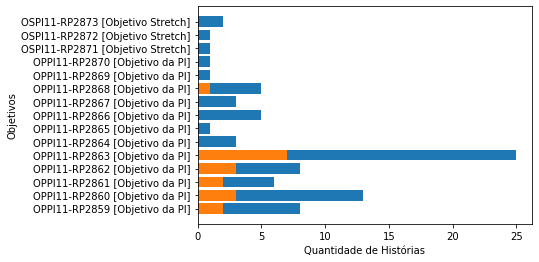

In [137]:
#Lista_US_FTR_OBJ.columns

#dataframe dos objetivos com objetivosXfeatures
df_grf_Objetivos_A = pd.merge(  df_objetivos[["Codigo","Nome","Tipo"]],
                                Lista_US_FTR_OBJ[["Codigo_Objetivo","Codigo_UserStories"]].groupby(['Codigo_Objetivo']).count(),
                                left_on='Codigo', 
                                right_on='Codigo_Objetivo',
                                how='left')

df_grf_Objetivos_A.rename(columns = {'Codigo_UserStories' : 'Total_Stories'}, inplace = True) #renomeia coluna

#dataframe com os objetivos a serem utilizados na geração do gráfico
df_grf_Objetivos = pd.merge(  df_grf_Objetivos_A,
                              Lista_US_FTR_OBJ[["Codigo_Objetivo","Codigo_UserStories"]][(Lista_US_FTR_OBJ['Status_UserStories'] == "Accepted")].groupby(['Codigo_Objetivo']).count(),
                                left_on='Codigo', 
                                right_on='Codigo_Objetivo',
                                how='left')

df_grf_Objetivos.rename(columns = {'Codigo_UserStories' : 'Total_Stories_Entregues'}, inplace = True) #renomeia coluna

df_grf_Objetivos['Total_Stories'].fillna(0, inplace = True)
df_grf_Objetivos['Total_Stories_Entregues'].fillna(0, inplace = True)

Objetivos = df_grf_Objetivos["Codigo"]+" ["+df_grf_Objetivos["Tipo"]+"]"
TotalStories = df_grf_Objetivos["Total_Stories"]
TotalStoriesEntregues = df_grf_Objetivos["Total_Stories_Entregues"]

plt.barh(Objetivos,TotalStories) 
plt.barh(Objetivos,TotalStoriesEntregues) 
#plt.yticks(rotation=45)
plt.title = 'Objetivos '+v_pi
plt.ylabel('Objetivos')
plt.xlabel('Quantidade de Histórias')
bar_larg = 0.4
transp = 0.7
#plt.legend()
plt.show()

In [116]:
df_grf_Objetivos

,Codigo,Nome,Tipo,Total_Stories,Total_Stories_Entregues
0,OPPI11-RP2859,Implementar integração de “Planos de Aulas TOT...,Objetivo da PI,8,2.0
1,OPPI11-RP2860,Acompanhar o Treinamento e Operação Assistida ...,Objetivo da PI,13,3.0
2,OPPI11-RP2861,Implementar recursos de segurança e interfaces...,Objetivo da PI,6,2.0
3,OPPI11-RP2862,Mapeamento dos ambientes de produção e das int...,Objetivo da PI,8,3.0
4,OPPI11-RP2863,Analisar e corrigir as inconsistências atualme...,Objetivo da PI,25,7.0
5,OPPI11-RP2864,Reconhecimento de Vendas do ano de 2019 do Sig...,Objetivo da PI,3,0.0
6,OPPI11-RP2865,REORG do SigaLoja para o Colégio Lato Sensu.,Objetivo da PI,1,0.0
7,OPPI11-RP2866,Upgrade de versão SigaLoja.,Objetivo da PI,5,0.0
8,OPPI11-RP2867,Acompanhar o levantamento do backoffice e faze...,Objetivo da PI,3,0.0
9,OPPI11-RP2868,Exploratória para Imersão do Processo de Venda...,Objetivo da PI,5,1.0
